In [ ]:

from cxr_foundation.mimic import parse_embedding_file_pattern
from cxr_foundation import embeddings_data


In [ ]:
import pandas as pd
from IPython.display import clear_output
import io
import os
import glob
import zipfile
import shutil

import numpy as np
import random as python_random
import matplotlib.pyplot as plt
from numpy import linalg as LA
import seaborn as sns
import sklearn.metrics as sklm
from sklearn.utils import shuffle

seed=19
np.random.seed(seed)
python_random.seed(seed)

In [ ]:
# path to the zip file
zip_file_path = "./Extracted_Embeddings/generalized-image-embeddings-for-the-mimic-chest-x-ray-dataset-1.0.zip"

# folder we want to extract the contents
extraction_folder = "./Extracted_Embeddings/"

# Unzip the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extraction_folder)

print("Extraction complete.")

Extraction complete.


In [10]:
df_embeddings = pd.read_csv("./Extracted_Embeddings/generalized-image-embeddings-for-the-mimic-chest-x-ray-dataset-1.0/SHA256SUMS.txt",
                            delimiter=" ", header=None,skiprows=[0])
display(df_embeddings.head(1))

,0,1
0,70e8c87d38d5dfba586218ccafb7428f76a3c7b08f6179...,files/p10/p10000032/s50414267/02aa804e-bde0afd...


In [11]:
SOURCE_COL_NAME = "embeddings_file"
# Create additional columns from file path components
df_embeddings = df_embeddings[[1]]
df_embeddings.rename(columns={1: "embeddings_file"}, inplace=True)
df_embeddings[["subject_id","study_id", "dicom_id"]] = df_embeddings.apply(
    lambda x: parse_embedding_file_pattern(x[SOURCE_COL_NAME]), axis=1, result_type="expand")
df_embeddings.embeddings_file="./Extracted_Embeddings/generalized-image-embeddings-for-the-mimic-chest-x-ray-dataset-1.0/"+df_embeddings.embeddings_file
df_embeddings.head(2)

,embeddings_file,subject_id,study_id,dicom_id
0,./Extracted_Embeddings/generalized-image-embed...,10000032,50414267,02aa804e-bde0afdd-112c0b34-7bc16630-4e384014
1,./Extracted_Embeddings/generalized-image-embed...,10000032,53189527,2a2277a9-b0ded155-c0de8eb9-c124d10e-82c5caab


In [12]:
df_embeddings.shape

(243324, 4)

In [13]:
example = embeddings_data.read_record_example(df_embeddings.embeddings_file.iloc[80000])
print(example)

features {
  feature {
    key: "image/id"
    value {
      bytes_list {
        value: "gs://superrad/inputs/mimic-cxr/files/p13/p13293446/s59443209/fab023c8-d71b0d99-29a6b65d-ef2c3103-d2de9e1a.dcm"
      }
    }
  }
  feature {
    key: "image/format"
    value {
      bytes_list {
        value: "png"
      }
    }
  }
  feature {
    key: "embedding"
    value {
      float_list {
        value: 0.138844699
        value: -0.451838
        value: 0.817155361
        value: -1.85264266
        value: -1.07941663
        value: -0.171157643
        value: 0.635435104
        value: 0.837272644
        value: -0.555685401
        value: 0.485173613
        value: -0.712232351
        value: -0.35557434
        value: -0.503891587
        value: 0.560500383
        value: 0.811845243
        value: 1.71060061
        value: -1.72992671
        value: 0.325764924
        value: 0.450283289
        value: 1.03946161
        value: 0.846848309
        value: 1.65851307
        value: -2.

## Embeddings Metadata

Data source:
- https://physionet.org/content/image-embeddings-mimic-cxr/1.0/
- https://physionet.org/content/mimiciv/1.0/
- https://physionet.org/content/mimic-cxr-jpg/2.0.0/


In [14]:
df_metadata = pd.read_csv("./mimic-cxr-2.0.0-metadata.csv.gz", compression="gzip")
MIMIC_CXR_Labels_df = pd.read_csv("./mimic-cxr-2.0.0-chexpert.csv.gz", compression="gzip")
demographic_df  = pd.read_csv("./admissions.csv.gz", compression="gzip")
patients_df  = pd.read_csv("./patients.csv.gz", compression="gzip")


In [15]:
df_metadata.info()
MIMIC_CXR_Labels_df.info()
demographic_df.info()
patients_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 377110 entries, 0 to 377109
Data columns (total 12 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   dicom_id                                    377110 non-null  object 
 1   subject_id                                  377110 non-null  int64  
 2   study_id                                    377110 non-null  int64  
 3   PerformedProcedureStepDescription           341598 non-null  object 
 4   ViewPosition                                361341 non-null  object 
 5   Rows                                        377110 non-null  int64  
 6   Columns                                     377110 non-null  int64  
 7   StudyDate                                   377110 non-null  int64  
 8   StudyTime                                   377110 non-null  float64
 9   ProcedureCodeSequence_CodeMeaning           377110 non-null  object 
 

In [16]:
df_metadata.head(2)

,dicom_id,subject_id,study_id,PerformedProcedureStepDescription,ViewPosition,Rows,Columns,StudyDate,StudyTime,ProcedureCodeSequence_CodeMeaning,ViewCodeSequence_CodeMeaning,PatientOrientationCodeSequence_CodeMeaning
0,02aa804e-bde0afdd-112c0b34-7bc16630-4e384014,10000032,50414267,CHEST (PA AND LAT),PA,3056,2544,21800506,213014.531,CHEST (PA AND LAT),postero-anterior,Erect
1,174413ec-4ec4c1f7-34ea26b7-c5f994f8-79ef1962,10000032,50414267,CHEST (PA AND LAT),LATERAL,3056,2544,21800506,213014.531,CHEST (PA AND LAT),lateral,Erect


In [17]:
demographic_df.insurance.value_counts()

insurance
Other       301530
Medicare    171360
Medicaid     50850
Name: count, dtype: int64

In [18]:
patients_df.shape

(382278, 6)

In [19]:
print(f'Number of records in chexpert labels before updating -1 and NAN values {len(MIMIC_CXR_Labels_df)} ')

Number of records in chexpert labels before updating -1 and NAN values 227827 


In [20]:
MIMIC_CXR_Labels_df.head(2)

,subject_id,study_id,Atelectasis,Cardiomegaly,Consolidation,Edema,Enlarged Cardiomediastinum,Fracture,Lung Lesion,Lung Opacity,No Finding,Pleural Effusion,Pleural Other,Pneumonia,Pneumothorax,Support Devices
0,10000032,50414267,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
1,10000032,53189527,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN


In [21]:
MIMIC_CXR_Labels_df.replace(np.nan,0,inplace=True)
MIMIC_CXR_Labels_df.replace(-1,0,inplace=True)

MIMIC_CXR_Labels_df.shape

(227827, 16)

In [22]:
MIMIC_CXR_Labels_df.head(2)

,subject_id,study_id,Atelectasis,Cardiomegaly,Consolidation,Edema,Enlarged Cardiomediastinum,Fracture,Lung Lesion,Lung Opacity,No Finding,Pleural Effusion,Pleural Other,Pneumonia,Pneumothorax,Support Devices
0,10000032,50414267,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,10000032,53189527,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


## Create the full labels file

Join embeddings list with Demography metadata files

In [23]:
demographic_df = demographic_df.drop_duplicates(subset='subject_id')
demographic_df.shape

(256878, 15)

In [24]:
demographic_df.ethnicity.value_counts()

ethnicity
WHITE                            159471
BLACK/AFRICAN AMERICAN            31190
ASIAN                             16526
UNKNOWN                           16464
OTHER                             15859
HISPANIC/LATINO                   13334
UNABLE TO OBTAIN                   3086
AMERICAN INDIAN/ALASKA NATIVE       948
Name: count, dtype: int64

In [25]:
# remove patients who have inconsistent documented race information
# credit to github.com/robintibor
ethnicity_df = demographic_df.loc[:,['subject_id', 'ethnicity']].drop_duplicates()
v = ethnicity_df.subject_id.value_counts()
subject_id_more_than_once = v.index[v.gt(1)]

print(f'count of duplicated subject id : {len(subject_id_more_than_once)}')

ambiguous_ethnicity_df = ethnicity_df[ethnicity_df.subject_id.isin(subject_id_more_than_once)]

inconsistent_race = ambiguous_ethnicity_df.subject_id.unique()

count of duplicated subject id : 0


In [26]:
data_df= df_metadata.merge(demographic_df,on='subject_id')
data_df.shape

(347747, 26)

In [27]:
# Each study contains one or more DICOMs
data_df = data_df.merge(patients_df, on=['subject_id'])

# Select only the columns you want to include
data_df=data_df.drop(columns=['anchor_year','anchor_year_group','dod','hadm_id', 'admittime','dischtime',
                              'deathtime','admission_type','admission_location','discharge_location'
                                ,'language','marital_status','edregtime','edouttime','hospital_expire_flag',
                                'PerformedProcedureStepDescription','ViewPosition','Rows','Columns',
                                'StudyDate','StudyTime','ProcedureCodeSequence_CodeMeaning',
                                'ViewCodeSequence_CodeMeaning','PatientOrientationCodeSequence_CodeMeaning'])
data_df.shape

(347747, 7)

In [28]:
data_df = data_df[~data_df.subject_id.isin(inconsistent_race)]
data_df = data_df.rename(columns={"ethnicity": "race"})
# Merge labelsdf based on (subject_id + study_id)
data_df = data_df.merge(MIMIC_CXR_Labels_df, on=['study_id','subject_id'])
data_df.shape


(347732, 21)

In [29]:

data_df = df_embeddings.merge(data_df, on=['dicom_id'], how='left')
data_df=data_df.loc[:, ~data_df.columns.duplicated()]
data_df.dropna(inplace=True)
data_df.rename(columns={'subject_id_x': 'subject_id','study_id_x': 'study_id'}, inplace=True)
data_df.shape

(228905, 24)

In [30]:

data_df=data_df[['embeddings_file','subject_id','study_id','dicom_id','gender','insurance',
                 'anchor_age','race','Enlarged Cardiomediastinum','Cardiomegaly','Lung Opacity',
                 'Lung Lesion','Edema','Consolidation','Pneumonia','Atelectasis'
                 ,'Pneumothorax','Pleural Effusion','Pleural Other','Fracture'
                 ,'Support Devices','No Finding']]
data_df.insert(4, "split","none", True)
data_df.rename(columns={'embeddings_file': 'path'},inplace=True)
data_df.race.value_counts()

race
WHITE                            150364
BLACK/AFRICAN AMERICAN            36572
HISPANIC/LATINO                   12427
OTHER                             10726
UNKNOWN                            9844
ASIAN                              7390
UNABLE TO OBTAIN                    918
AMERICAN INDIAN/ALASKA NATIVE       664
Name: count, dtype: int64

In [31]:
data_df.isna().sum()


path                          0
subject_id                    0
study_id                      0
dicom_id                      0
split                         0
gender                        0
insurance                     0
anchor_age                    0
race                          0
Enlarged Cardiomediastinum    0
Cardiomegaly                  0
Lung Opacity                  0
Lung Lesion                   0
Edema                         0
Consolidation                 0
Pneumonia                     0
Atelectasis                   0
Pneumothorax                  0
Pleural Effusion              0
Pleural Other                 0
Fracture                      0
Support Devices               0
No Finding                    0
dtype: int64

In [32]:
data_df['anchor_age'] = data_df['anchor_age'].astype('int64')

data_df.insert(data_df.columns.get_loc('anchor_age') + 1, 'age_decile', None)

# Define custom bin edges and labels
bin_edges = [0, 20, 40, 60, 80, float('inf')]
bin_labels = ['0-20', '20-40', '40-60', '60-80', '80+']

# Use cut to create age deciles based on custom bins
data_df['age_decile'] = pd.cut(data_df['anchor_age'],
                                    bins=bin_edges, labels=bin_labels,
                                    right=False)
display(data_df.head(2))

,path,subject_id,study_id,dicom_id,split,gender,insurance,anchor_age,age_decile,race,...,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices,No Finding
0,./Extracted_Embeddings/generalized-image-embed...,10000032,50414267,02aa804e-bde0afdd-112c0b34-7bc16630-4e384014,none,F,Medicaid,52,40-60,WHITE,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,./Extracted_Embeddings/generalized-image-embed...,10000032,53189527,2a2277a9-b0ded155-c0de8eb9-c124d10e-82c5caab,none,F,Medicaid,52,40-60,WHITE,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [33]:
data_df.drop(columns=['anchor_age'],inplace=True)

In [34]:
print(f'Number of records after merging meta data, diagnosticl labeles and vector embedings and removing duplicates {len(data_df)} ')

Number of records after merging meta data, diagnosticl labeles and vector embedings and removing duplicates 228905 


In [35]:
unique_sub_id = data_df.subject_id.unique()

train_percent, valid_percent, test_percent = 0.80, 0.10, 0.10

unique_sub_id = shuffle(unique_sub_id)
value1 = (round(len(unique_sub_id)*train_percent))
value2 = (round(len(unique_sub_id)*valid_percent))
value3 = value1 + value2
value4 = (round(len(unique_sub_id)*test_percent))


In [36]:
print("Patients in training set: " + str(value1))

Patients in training set: 42458


In [37]:
print("Patients in validation set: " + str(value2))

Patients in validation set: 5307


In [38]:
print("Patients in testing set: " + str(value4))

Patients in testing set: 5307


In [39]:
data_df = shuffle(data_df)

train_sub_id = unique_sub_id[:value1]
validate_sub_id = unique_sub_id[value1:value3]
test_sub_id = unique_sub_id[value3:]

print(type(train_sub_id))
print(train_sub_id)

<class 'numpy.ndarray'>
[14631209 12474949 17954787 ... 13961548 13378640 11011523]


In [40]:
data_df.loc[data_df.subject_id.isin(train_sub_id), "split"]="train"
data_df.loc[data_df.subject_id.isin(validate_sub_id), "split"]="validate"
data_df.loc[data_df.subject_id.isin(test_sub_id), "split"]="test"

In [41]:
data_df.split.value_counts()

split
train       182896
validate     23154
test         22855
Name: count, dtype: int64

In [42]:
data_df.shape

(228905, 23)

In [43]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 228905 entries, 101426 to 127797
Data columns (total 23 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   path                        228905 non-null  object  
 1   subject_id                  228905 non-null  int64   
 2   study_id                    228905 non-null  int64   
 3   dicom_id                    228905 non-null  object  
 4   split                       228905 non-null  object  
 5   gender                      228905 non-null  object  
 6   insurance                   228905 non-null  object  
 7   age_decile                  228905 non-null  category
 8   race                        228905 non-null  object  
 9   Enlarged Cardiomediastinum  228905 non-null  float64 
 10  Cardiomegaly                228905 non-null  float64 
 11  Lung Opacity                228905 non-null  float64 
 12  Lung Lesion                 228905 non-null  float64 
 13 

In [44]:
# Generic path
data_df['path'] = data_df['path'].str.replace(r'^./Extracted_Embeddings/generalized-image-embeddings-for-the-mimic-chest-x-ray-dataset-1.0/', '', regex=True)


In [45]:
data_df.head(2)

,path,subject_id,study_id,dicom_id,split,gender,insurance,age_decile,race,Enlarged Cardiomediastinum,...,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices,No Finding
101426,files/p14/p14174495/s51234155/2404c1ab-a3b40cd...,14174495,51234155,2404c1ab-a3b40cde-0c825331-769edf1e-2d99b2cf,train,M,Medicare,60-80,WHITE,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
71754,files/p12/p12958709/s57422323/cc870a3a-f53f453...,12958709,57422323,cc870a3a-f53f453b-2ac5395a-ac1794e8-e0c0bba8,train,F,Other,20-40,HISPANIC/LATINO,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [64]:
data_df.to_csv("./Extracted_Embeddings/processed_mimic_df.csv",index=False)

In [65]:
df_train = data_df[data_df["split"] == "train"]
df_train.to_csv("./Extracted_Embeddings/mimic_train_df.csv",index=False)

In [48]:
df_train.shape

(182896, 23)

In [66]:
df_validate = data_df[data_df["split"] == "validate"]
df_validate.to_csv("./Extracted_Embeddings/mimic_validation_df.csv",index=False)

In [67]:
df_test = data_df[data_df["split"] == "test"]
df_test.shape

(21591, 23)

In [51]:
df_test=df_test[df_test.race.isin(['WHITE','BLACK/AFRICAN AMERICAN','HISPANIC/LATINO','OTHER',
                                   'ASIAN','AMERICAN INDIAN/ALASKA NATIVE'])]
df_test.shape

(21591, 23)

In [52]:
df_test.race.value_counts()

race
WHITE                            14508
BLACK/AFRICAN AMERICAN            3685
HISPANIC/LATINO                   1392
OTHER                             1062
ASIAN                              760
AMERICAN INDIAN/ALASKA NATIVE      184
Name: count, dtype: int64

In [ ]:
test_counts=df_test.subject_id.unique()
len(test_counts)

In [63]:
df_test.to_csv("./Extracted_Embeddings/mimic_test_df.csv",index=False)

In [55]:
data_df=pd.concat([df_train,df_validate,df_test],axis=0)
data_df.shape

(227641, 23)

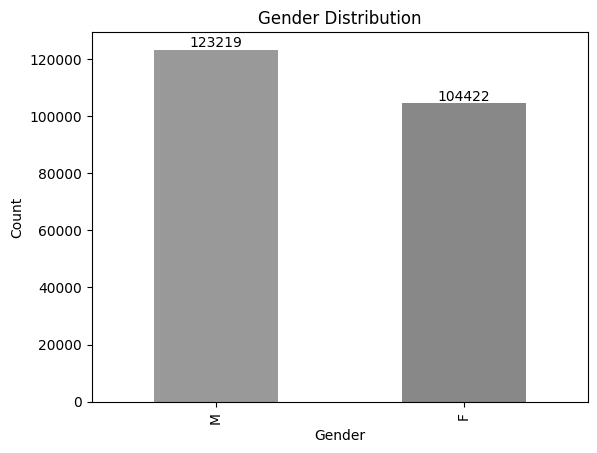

In [56]:
# Count the occurrences of each gender
gender_counts = data_df.gender.value_counts()

# Create a bar plot with labels
fig, ax = plt.subplots()
gender_counts.plot(kind='bar', color=['#999999', '#888888', 
                                      '#777777', '#666666', '#555555', 
                                      '#444444', '#333333'], ax=ax)

# Add labels
for i, v in enumerate(gender_counts):
    ax.text(i, v + 0.5, str(v), ha='center', va='bottom')

plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')

# Show the plot
plt.show()

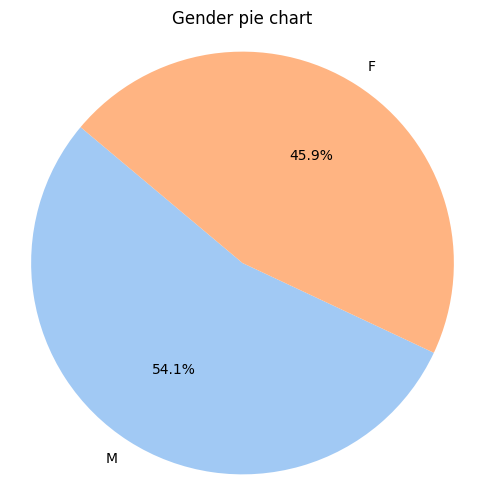

In [57]:
# Count the occurrences of each race
gender_counts = data_df.gender.value_counts()

# Define a Seaborn color palette with muted colors
sns.set_palette("pastel")

# Create a pie chart using Seaborn
plt.figure(figsize=(6, 6))  # Adjust the figure size as needed
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Gender pie chart')

# Show the pie chart
plt.axis('equal')
plt.show()

In [58]:
data_df.race.value_counts()

race
WHITE                            150364
BLACK/AFRICAN AMERICAN            36572
HISPANIC/LATINO                   12427
OTHER                             10726
UNKNOWN                            8813
ASIAN                              7390
UNABLE TO OBTAIN                    685
AMERICAN INDIAN/ALASKA NATIVE       664
Name: count, dtype: int64

C:\Users\gebre\AppData\Local\Temp\ipykernel_16080\1176276377.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data_df, x='age_decile', palette="pastel")


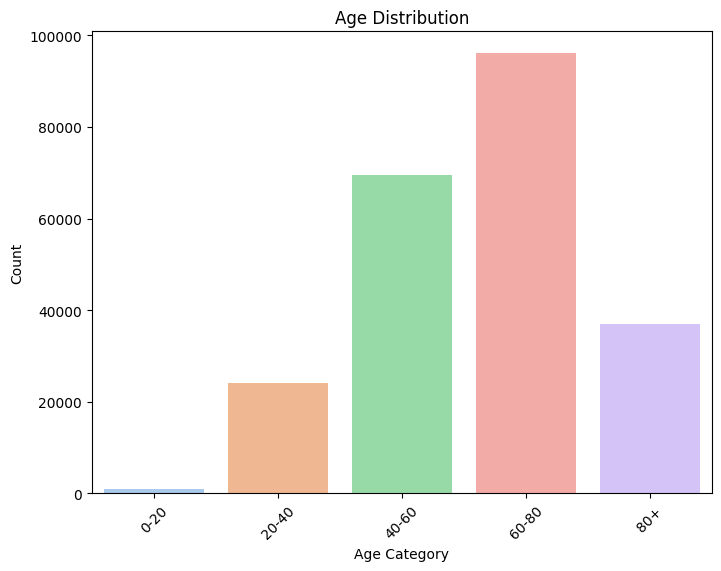

In [60]:
# Set a Seaborn style with muted colors
sns.set_palette("pastel")

# Create a count plot for age categories
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
sns.countplot(data=data_df, x='age_decile', palette="pastel")
plt.title('Age Distribution')
plt.xlabel('Age Category')
plt.ylabel('Count')

# Show the count plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

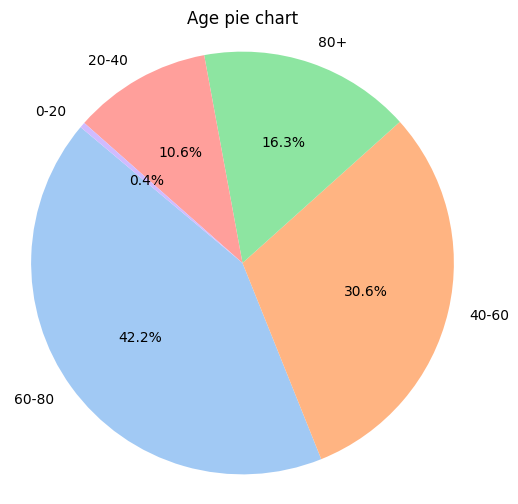

In [61]:
# Count the occurrences of each race
age_counts = data_df.age_decile.value_counts()

# Define a Seaborn color palette with muted colors
sns.set_palette("pastel")

# Create a pie chart using Seaborn
plt.figure(figsize=(6, 6))  # Adjust the figure size as needed
plt.pie(age_counts, labels=age_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Age pie chart')

# Show the pie chart
plt.axis('equal')
plt.show()

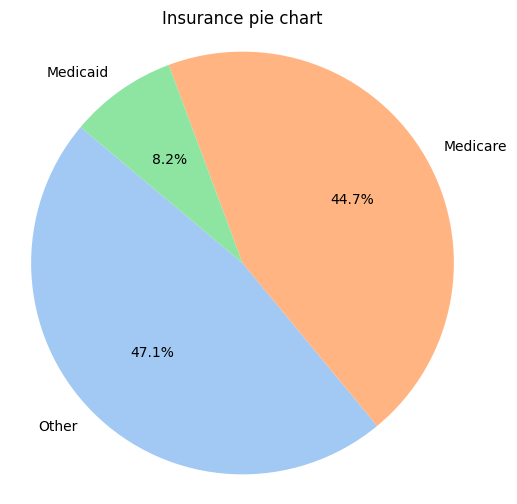

In [62]:
# Count the occurrences of each race
insu_counts = data_df.insurance.value_counts()

# Define a Seaborn color palette with muted colors
sns.set_palette("pastel")

# Create a pie chart using Seaborn
plt.figure(figsize=(6, 6))  # Adjust the figure size as needed
plt.pie(insu_counts, labels=insu_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Insurance pie chart')

# Show the pie chart
plt.axis('equal')
plt.show()